In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tenacity==9.0.0
!pip install langchain==0.3.12
!pip install langchain-openai==0.2.12
!pip install langchain_community==0.3.12
!pip install langgraph==0.2.59
!pip install pysqlite3-binary==0.5.4
!pip install langchain_chroma==0.1.4
!pip install pandas==2.2.3
!pip install pypdf==5.1.0
!pip install nbformat==5.10.4

  Using cached langchain_openai-0.2.12-py3-none-any.whl.metadata (2.7 kB)
Using cached langchain_openai-0.2.12-py3-none-any.whl (50 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 96.1 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12

# What Does Tool mean in Agentic AI?


🧠 The @tool decorator makes a normal Python function usable by an AI agent.

💬 It tells the agent what the function does, what inputs it needs, and what it returns.

⚙️ This helps the agent not just talk, but actually do things using your code.

- 🧩 **Layer A – Schema Extraction:** Shows how the `@tool` decorator automatically builds a JSON schema from the function’s type hints and docstring so the agent knows what inputs are required.  
- 🧠 **Layer B – Metadata Construction:** Displays the generated tool metadata — its name, description, and argument schema — that turns a simple Python function into a self-describing skill.  
- ⚙️ **Layer C – Execution Bridge:** Demonstrates how the tool object can be invoked with structured arguments, linking the LLM’s reasoning step to real Python execution.  


In [7]:
from langchain_core.tools import tool

@tool
def find_product(x: int, y: int) -> int:
    """Multiply two numbers and return the product."""
    return x * y

# ✅ Check its actual type
print(type(find_product))

# ✅ Inspect the attributes LangChain built for you
print("Name:", find_product.name)
print("Description:", find_product.description)
print("Args Schema:", find_product.args_schema.schema_json(indent=2))

# ✅ Test that it still works
print("Run output:", find_product.run({"x": 3, "y": 4}))


<class 'langchain_core.tools.structured.StructuredTool'>
Name: find_product
Description: Multiply two numbers and return the product.
Args Schema: {
  "description": "Multiply two numbers and return the product.",
  "properties": {
    "x": {
      "title": "X",
      "type": "integer"
    },
    "y": {
      "title": "Y",
      "type": "integer"
    }
  },
  "required": [
    "x",
    "y"
  ],
  "title": "find_product",
  "type": "object"
}
Run output: 12


/tmp/ipython-input-2067075038.py:15: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("Args Schema:", find_product.args_schema.schema_json(indent=2))


In [6]:
from langchain_core.tools import tool

@tool
def find_product(x: int, y: int) -> int:
    """
    This function is used to multiply two numbers and return their product.
    It takes two integers as inputs and returns an integer as output.
    """
    return x * y

print("=== LAYER A: Schema Extraction ===")
print(find_product.args_schema.schema_json(indent=2))

print("\n=== LAYER B: Metadata Construction ===")
print("Type :", type(find_product))
print("Name :", find_product.name)
print("Desc :", find_product.description)

print("\n=== LAYER C: Execution Bridge ===")
args = {"x": 8, "y": 9}
print("Calling with:", args)
print("Result      :", find_product.invoke(args))


=== LAYER A: Schema Extraction ===
{
  "description": "This function is used to multiply two numbers and return their product.\nIt takes two integers as inputs and returns an integer as output.",
  "properties": {
    "x": {
      "title": "X",
      "type": "integer"
    },
    "y": {
      "title": "Y",
      "type": "integer"
    }
  },
  "required": [
    "x",
    "y"
  ],
  "title": "find_product",
  "type": "object"
}

=== LAYER B: Metadata Construction ===
Type : <class 'langchain_core.tools.structured.StructuredTool'>
Name : find_product
Desc : This function is used to multiply two numbers and return their product.
It takes two integers as inputs and returns an integer as output.

=== LAYER C: Execution Bridge ===
Calling with: {'x': 8, 'y': 9}
Result      : 72


/tmp/ipython-input-1665677180.py:12: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print(find_product.args_schema.schema_json(indent=2))


In [7]:
find_product

StructuredTool(name='find_product', description='This function is used to multiply two numbers and return their product.\nIt takes two integers as inputs and returns an integer as output.', args_schema=<class 'langchain_core.utils.pydantic.find_product'>, func=<function find_product at 0x7fe3c7e74e00>)

# Setup OpenAI API Key

In [1]:
import os, textwrap
from openai import OpenAI
import getpass

# Prompt user for a password (input hidden)
OPENAI_API_KEY = getpass.getpass("Enter your password: ")


Enter your password: ··········


# Basic ReAct Agent

In [14]:
# ------------------------------
# 1. Define tools with @tool
# ------------------------------
from langchain_core.tools import tool

@tool
def calculate_bmi(weight_kg: float, height_m: float) -> float:
    """
    Compute Body Mass Index (BMI) given weight in kilograms and height in meters.
    Returns the BMI as a float.
    """
    return weight_kg / (height_m ** 2)

@tool
def daily_water_intake(weight_kg: float) -> float:
    """
    Estimate recommended daily water intake (in liters) based on body weight.
    Uses a simple heuristic: 35 ml per kg of body weight.
    """
    return round(weight_kg * 0.035, 2)


In [13]:
# ------------------------------
# 2. Setup OpenAI LLM
# ------------------------------
import os
from langchain_openai import ChatOpenAI

# Set your OpenAI API key (recommended to set this in environment, not in code)
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

model = ChatOpenAI(
    model="gpt-4o-mini",   # or "gpt-4o"
    temperature=0          # deterministic for demos
)


### 💬 Understanding `create_react_agent` and Message Types

- **`create_react_agent`** — Builds a ready-to-use ReAct-style agent that can *reason* and *act* using provided tools. It links the LLM, system instructions, and toolset into one workflow for autonomous decision-making.

### 🧠 Message Types in LangChain
- **`SystemMessage`** → Sets the agent’s role, behavior, or rules (e.g., “You are a helpful assistant”).  
- **`HumanMessage`** → Represents user input or queries.  
- **`AIMessage`** → Captures the model’s response or reasoning output.  
- **`ToolMessage`** → Records information returned from a tool call during execution.  

Together, these message types create the **conversation context** that the ReAct agent uses to plan, reason, and respond effectively.


In [20]:
# ------------------------------
# 3. Create a ReAct agent with LangGraph
# ------------------------------
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import SystemMessage

# List of tools the agent is allowed to use
agent_tools = [calculate_bmi, daily_water_intake]

system_prompt = SystemMessage(
    content=(
        "You are a helpful health assistant.\n"
        "Always use the provided tools to do any numeric calculation.\n"
        "Do not calculate in your head; instead, call the tools.\n"
        "Explain your answers clearly to the user."
    )
)

agent_graph = create_react_agent(
    model=model,
    tools=agent_tools,
    state_modifier=system_prompt,
)


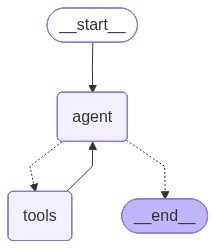

In [34]:
from IPython.display import Image, display

try:
    # agent_graph should be your compiled graph: builder.compile(...)
    g = agent_graph.get_graph()

    # Returns PNG bytes
    png_bytes = g.draw_mermaid_png()
    display(Image(png_bytes))

except Exception as e:
    print("Graph PNG visualization failed:", repr(e))


# Execute the ReAct Agent

In [24]:
# ------------------------------
# 4. Run an example query
# ------------------------------
# User asks a practical health question
inputs = {
    "messages": [
        ("user", "My weight is 72 kg and my height is 1.75 m. "
                 "What is my BMI and how much water should I drink per day?")
    ]
}

result = agent_graph.invoke(inputs)

# Final answer
print("Final answer from agent:\n")
print(result["messages"][-1].content)

# Optional: Show full reasoning trace (tool calls, thoughts, etc.)
print("\n\nStep-by-step trace:\n")
for m in result["messages"]:
    print(m.pretty_repr())


Final answer from agent:

Your Body Mass Index (BMI) is approximately **23.51**, which is considered to be within the normal weight range.

Regarding your daily water intake, you should aim to drink about **2.52 liters** of water each day. This is based on a recommendation of 35 ml of water per kilogram of body weight. 

If you have any more questions or need further assistance, feel free to ask!


Step-by-step trace:

================================ Human Message =================================

My weight is 72 kg and my height is 1.75 m. What is my BMI and how much water should I drink per day?
================================== Ai Message ==================================
Tool Calls:
  calculate_bmi (call_YUARvAmTxAcLeadqQ40KyN7i)
 Call ID: call_YUARvAmTxAcLeadqQ40KyN7i
  Args:
    weight_kg: 72
    height_m: 1.75
  daily_water_intake (call_SXme9TP050B9l4C7UKesYr5j)
 Call ID: call_SXme9TP050B9l4C7UKesYr5j
  Args:
    weight_kg: 72
================================= Tool Message =

In [25]:
result

{'messages': [HumanMessage(content='My weight is 72 kg and my height is 1.75 m. What is my BMI and how much water should I drink per day?', additional_kwargs={}, response_metadata={}, id='ac879733-94ef-4354-a6f7-eb8e27090d9b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_YUARvAmTxAcLeadqQ40KyN7i', 'function': {'arguments': '{"weight_kg": 72, "height_m": 1.75}', 'name': 'calculate_bmi'}, 'type': 'function'}, {'id': 'call_SXme9TP050B9l4C7UKesYr5j', 'function': {'arguments': '{"weight_kg": 72}', 'name': 'daily_water_intake'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 58, 'prompt_tokens': 183, 'total_tokens': 241, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'finish_reason':

In [19]:
# ------------------------------
# Example 2
# ------------------------------
inputs = {
    "messages": [
        (
            "user",
            "If a person weighs 85 kg and is 1.8 m tall, "
            "what is their BMI, and how much water should they drink per day?"
        )
    ]
}

result = agent_graph.invoke(inputs)

# Print final response
print(f"Agent returned:\n{result['messages'][-1].content}\n")

# Step-by-step reasoning and tool usage
print("Step-by-step execution trace:\n")
for message in result["messages"]:
    print(message.pretty_repr())


Agent returned:
The Body Mass Index (BMI) for a person weighing 85 kg and standing 1.8 m tall is approximately **26.23**. This value indicates that the person falls into the overweight category according to standard BMI classifications.

Additionally, the recommended daily water intake for this person is about **2.98 liters**. This is based on a guideline of 35 ml of water per kilogram of body weight. 

It's important to stay hydrated for overall health!

Step-by-step execution trace:

================================ Human Message =================================

If a person weighs 85 kg and is 1.8 m tall, what is their BMI, and how much water should they drink per day?
================================== Ai Message ==================================
Tool Calls:
  calculate_bmi (call_mKkB5YFYLKC1dHl4hsv2na3R)
 Call ID: call_mKkB5YFYLKC1dHl4hsv2na3R
  Args:
    weight_kg: 85
    height_m: 1.8
  daily_water_intake (call_LkUvDoXhhw4RG8qHGKUkNSOo)
 Call ID: call_LkUvDoXhhw4RG8qHGKUkNSOo


# Debugging the Agent

In [20]:
# ------------------------------
# Create ReAct agent with debug enabled
# ------------------------------
agent_graph = create_react_agent(
    model=model,
    state_modifier=system_prompt,
    tools=agent_tools,
    debug=True   # Enables detailed reasoning and tool call traces
)

# ------------------------------
# Example 1: Single health query
# ------------------------------
inputs = {
    "messages": [
        ("user", "My weight is 70 kg and height is 1.75 m. Please calculate my BMI.")
    ]
}

result = agent_graph.invoke(inputs)

# Final output
print(f"Agent returned:\n{result['messages'][-1].content}\n")

# Step-by-step reasoning trace
print("Step-by-step execution trace:\n")
for message in result["messages"]:
    print(message.pretty_repr())


[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [('user',
               'My weight is 70 kg and height is 1.75 m. Please calculate my '
               'BMI.')]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [('user', 'My weight is 70 kg and height is 1.75 m. Please calculate my BMI.')]
[0:checkpoint] State at the end of step 0:
{'messages': [HumanMessage(content='My weight is 70 kg and height is 1.75 m. Please calculate my BMI.', additional_kwargs={}, response_metadata={}, id='089d1814-1a71-400f-adab-120433503ffc')]}
[1:tasks] Starting 1 task for step 1:
- agent -> {'is_last_step': False,
 'messages': [HumanMessage(content='My weight is 70 kg and height is 1.75 m. Please calculate my BMI.', additional_kwargs={}, response_metadata={}, id='089d1814-1a71-400f-adab-120433503ffc')],
 'remaining_steps': 24}
[1:writes] Finished step 1 with writes to 1 channel:
- messages -> [AIMessage(content